**Diabetes dataset — Sampling & Bootstrap analysis
**Course:** COMP_SCI-5530-0005-43793-2025FS — Principles of Data Science**

I provided 768-row dataset as the population for this exercise. The notebook uses a fixed random seed so your results are reproducible. If you are running in Colab, upload `diabetes.csv` via the upload dialog; if running locally keep the file path as `/mnt/data/diabetes.csv`.

In [5]:
from google.colab import files
uploaded = files.upload()


Saving diabetes.csv to diabetes.csv


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [7]:
df = pd.read_csv("diabetes.csv")

print("Data loaded. Shape:", df.shape)
df.head()

Data loaded. Shape: (768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


***PART-A Random sample (n=25): Glucose mean and max***

I draw a reproducible random sample of 25 observations and compare the sample mean and sample maximum of the **Glucose** variable with the population values. A visual overlay helps highlight differences that arise from sampling variability.

In [8]:
seed = 42
sample_a = df.sample(n=25, random_state=seed)

sample_glucose_mean = sample_a['Glucose'].mean()
sample_glucose_max = sample_a['Glucose'].max()

population_glucose_mean = df['Glucose'].mean()
population_glucose_max = df['Glucose'].max()

print("\n--- Part (a): Glucose Statistics ---")
print("Sample mean:", sample_glucose_mean)
print("Sample max:", sample_glucose_max)
print("Population mean:", population_glucose_mean)
print("Population max:", population_glucose_max)


--- Part (a): Glucose Statistics ---
Sample mean: 116.64
Sample max: 183
Population mean: 120.89453125
Population max: 199


**Glucose Histogram**

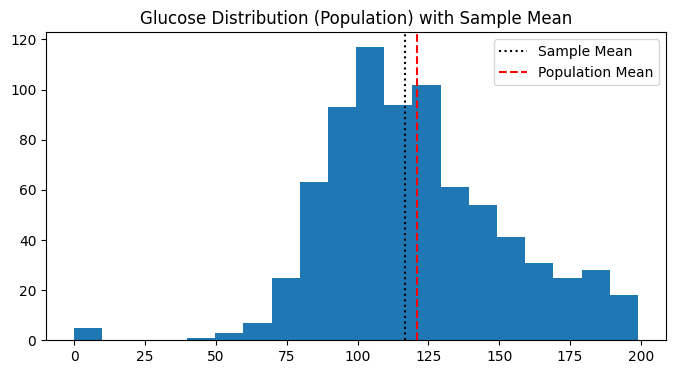

In [9]:
plt.figure(figsize=(8,4))
plt.hist(df['Glucose'], bins=20)
plt.axvline(sample_glucose_mean, color='black', linestyle='dotted', label="Sample Mean")
plt.axvline(population_glucose_mean, color='red', linestyle='dashed', label="Population Mean")
plt.title("Glucose Distribution (Population) with Sample Mean")
plt.legend()
plt.show()

**Bar comparison**

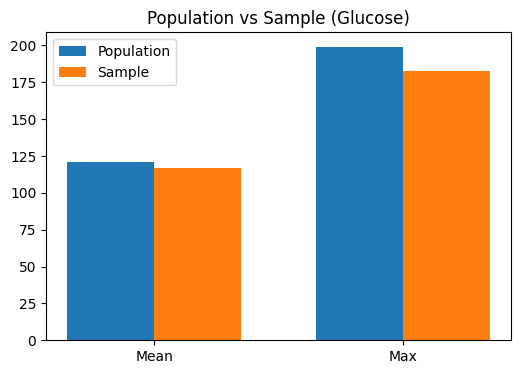

In [10]:
plt.figure(figsize=(6,4))
labels = ["Mean", "Max"]
pop_vals = [population_glucose_mean, population_glucose_max]
sample_vals = [sample_glucose_mean, sample_glucose_max]

x = np.arange(len(labels))
width = 0.35

plt.bar(x - width/2, pop_vals, width, label="Population")
plt.bar(x + width/2, sample_vals, width, label="Sample")
plt.xticks(x, labels)
plt.title("Population vs Sample (Glucose)")
plt.legend()
plt.show()

**Interpretation** : The sample mean is expected to differ somewhat from the population mean because n=25 is small relative to the population. The histogram above lets us see whether the sample has more low or high glucose readings compared to the entire dataset.

**PART-B - 98th percentile of BMI**
We compute the 98th percentile for BMI in the sample and population. High percentiles are particularly sensitive to small-sample noise, which we comment on below.

In [11]:
sample_bmi_98 = np.percentile(sample_a['BMI'], 98)
population_bmi_98 = np.percentile(df['BMI'], 98)

print("\n--- Part (b): BMI 98th Percentile ---")
print("Sample 98th percentile:", sample_bmi_98)
print("Population 98th percentile:", population_bmi_98)


--- Part (b): BMI 98th Percentile ---
Sample 98th percentile: 40.248
Population 98th percentile: 47.52599999999996


**BMI distribution**

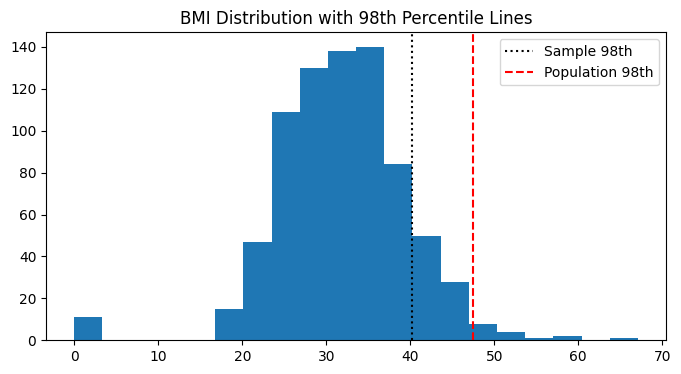

In [12]:
plt.figure(figsize=(8,4))
plt.hist(df['BMI'], bins=20)
plt.axvline(sample_bmi_98, color='black', linestyle='dotted', label="Sample 98th")
plt.axvline(population_bmi_98, color='red', linestyle='dashed', label="Population 98th")
plt.title("BMI Distribution with 98th Percentile Lines")
plt.legend()
plt.show()


**Bar Comparison**

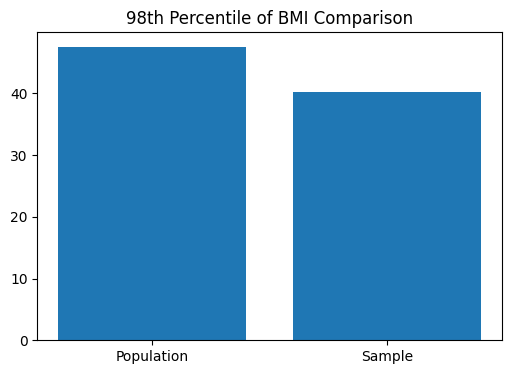

In [13]:
plt.figure(figsize=(6,4))
plt.bar(["Population", "Sample"], [population_bmi_98, sample_bmi_98])
plt.title("98th Percentile of BMI Comparison")
plt.show()

**Interpretation (medium):** With only 25 points the sample's 98th percentile can be much lower than the population's because the sample may not include extreme BMI values. The population 98th percentile reflects the tail of the full 768 observations, while a small sample rarely captures the tail reliably.

***PART-C_Bootstrap for BloodPressure***

We perform a bootstrap procedure: generate B=500 bootstrap samples, each of size 150 (with replacement) drawn from the population. For each bootstrap sample we compute the sample mean, sample standard deviation, and the 98th percentile of BloodPressure. We then summarize the averages of these bootstrap estimates and compare them to the population statistics.

In [14]:
B = 500
n_boot = 150

bp = df['BloodPressure'].values

boot_means = []
boot_stds = []
boot_p98 = []

rng = np.random.default_rng(seed)

for _ in range(B):
    idx = rng.integers(0, len(bp), size=n_boot)
    s = bp[idx]
    boot_means.append(np.mean(s))
    boot_stds.append(np.std(s))
    boot_p98.append(np.percentile(s, 98))

boot_means = np.array(boot_means)
boot_stds = np.array(boot_stds)
boot_p98 = np.array(boot_p98)

pop_mean = np.mean(bp)
pop_std = np.std(bp)
pop_98 = np.percentile(bp, 98)

print("\n--- Part (c): Bootstrap Results for BloodPressure ---")
print("Population mean:", pop_mean)
print("Bootstrap average mean:", boot_means.mean())

print("Population std:", pop_std)
print("Bootstrap average std:", boot_stds.mean())

print("Population 98th percentile:", pop_98)
print("Bootstrap average 98th percentile:", boot_p98.mean())



--- Part (c): Bootstrap Results for BloodPressure ---
Population mean: 69.10546875
Bootstrap average mean: 69.13585333333333
Population std: 19.343201628981696
Bootstrap average std: 18.98346459071148
Population 98th percentile: 99.31999999999994
Bootstrap average 98th percentile: 97.88816000000003


**Mean Distribution**

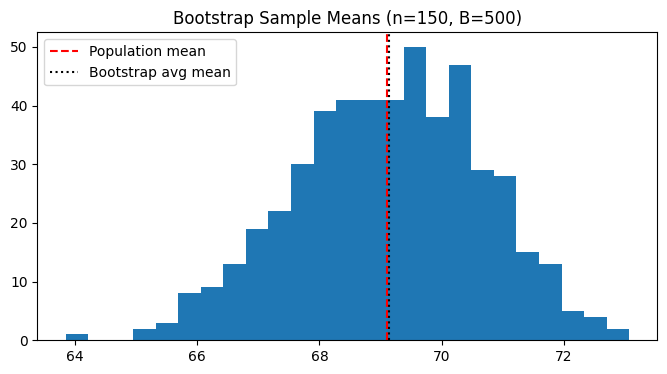

In [15]:
plt.figure(figsize=(8,4))
plt.hist(boot_means, bins=25)
plt.axvline(pop_mean, color='red', linestyle='dashed', label="Population mean")
plt.axvline(boot_means.mean(), color='black', linestyle='dotted', label="Bootstrap avg mean")
plt.title("Bootstrap Sample Means (n=150, B=500)")
plt.legend()
plt.show()

***Bar comparison***

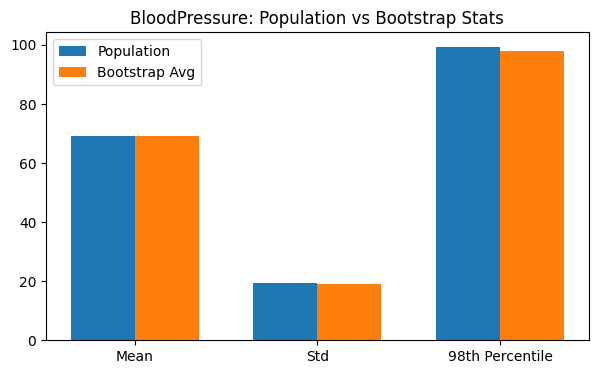

In [16]:
labels = ["Mean", "Std", "98th Percentile"]
pop_vals = [pop_mean, pop_std, pop_98]
boot_vals = [boot_means.mean(), boot_stds.mean(), boot_p98.mean()]

x = np.arange(len(labels))
width = 0.35

plt.figure(figsize=(7,4))
plt.bar(x - width/2, pop_vals, width, label="Population")
plt.bar(x + width/2, boot_vals, width, label="Bootstrap Avg")
plt.xticks(x, labels)
plt.title("BloodPressure: Population vs Bootstrap Stats")
plt.legend()
plt.show()

**Interpretation (medium):**
- The bootstrap average of the sample means should closely match the population mean, reflecting the unbiasedness of the sample mean under resampling.
- The bootstrap-averaged std and high-percentile estimates provide an empirical sense of the sampling variability for these statistics; percentiles, especially in the tail, tend to be more variable and may show slight downward bias when averaged across finite-size bootstrap samples.